[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/e4497%2Fescenarios-de-aprendizaje%2F-%2Ftree%2Fmain/HEAD) [<img src="https://upload.wikimedia.org/wikipedia/commons/9/93/GPLv3_Logo.svg" style="width: 50px;"/>](https://es.wikipedia.org/wiki/GNU_General_Public_License)

# Desarrollo de modelos de IA para predicción de supervivencia por sepsis

A continuación vamos a desarrollar, más en profundidad, modelos de IA que utilicen conjuntos muy grandes de datos reales que permitan a nuestro modelo aprender de manera más eficiente.

Este Jupyter notebook te va a guiar por el proceso de construcción de un modelo de IA. Posteriormente deberás emplear el modelo para analizar sus resultados, su comportamiento y hacer propuestas de mejora sobre los distintos hiperparámetros que lo definen.

¡Ánimo y adelante!

***
***Nota***: Los datos empleados en este notebook pueden descargarse libremente de la web https://archive.ics.uci.edu/ml/datasets/Sepsis+survival+minimal+clinical+records, gracias al respositorio sobre aprendizaje automático del Center for Machine Learning and Intelligent Systems [1]

[1] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science
***

1. Lo primero que vamos a hacer es importar los paquetes necesarios para hacer todas las operaciones que tenemos pensado hacer. Para ello será recomendable que revises la sintaxis de la declaración `import` en el manual de ayuda de Python, especialmente [los ejemplos del apartado 7.11](https://docs.python.org/es/3/reference/simple_stmts.html#the-import-statement). Siguiendo aquella sintaxis deberás importar los siguientes paquetes: [pandas](https://pandas.pydata.org/docs/user_guide/index.html), [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html), [sklearn](https://scikit-learn.org/stable/user_guide.html), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/index) y [graphviz](https://pypi.org/project/graphviz/). Tienes linkados en los nombres de las librerías anteriores guías para el uso elemental de las distintas funciones de cada paquete. Aunque no es algo en lo que necesitemos entrar ahora en detalle, sí es interesante que acudas de manera habitual a estas referencias para entender mejor la sintaxis de cada función y poder ver ejemplos y sus resultados. Resultan fuentes de información muy didácticas que te acompañarán en el proceso de aprendizaje de las distintas funciones y su uso.

In [1]:
# TAREA 1
# ----- Aquí debe empezar tu código. Extensión aproximada: cinco líneas de código
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
# ----- Aquí debe terminar tu código

2. El segundo paso será cargar los datos. Tienes el dataset completo en [formato csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas) (Comma Separated Value) en el propio repositorio que estás ejecutando, por lo que solo hace falta introducir el comando de carga. Lo haremos a través de la librería `pandas` para cargar el dataset en un DataFrame, en particular, a través de la función `read_csv` de `pandas`. Puedes consultar su sintaxis [aquí](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), donde veréis todo tipo de parámetros para la función, si bien os aconsejo acudir directamente al ejemplo del final, donde solo se hace necesario que le paséis a la función el nombre del archivo csv que queréis cargar.


>> **Nota**: Para conocer los distintos atributos y métodos aplicables a un dataframe, os aconsejo que os dirijáis a [lo que pone al respecto la documentación de la librería pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [2]:
# TAREA 2
# ----- Aquí debe empezar tu código. Extensión aproximada: una línea de código
data_train = pd.read_csv('s41598-020-73558-3_sepsis_survival_primary_cohort.csv')
# ----- Aquí debe terminar tu código

3. Una vez cargados los datos, conviene realizar un **análisis exploratorio** de los mismos. En la celda que tienes a continuación, aplica el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) al dataframe donde hemos guardado los datos para averiguar qué campos tiene y qué significan, así como para saber cuantos elementos tiene y en qué formato están guardados. A continuación, usa el método [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) al mismo dataframe para entender mejor cómo se comportan cada una de las variables contenidas, qué rango de variación tienen, así como valores característicos de su posición y dispersión.


In [3]:
# TAREA 3
# Escribe el comando para representar información acerca del contenido del dataframe, 
# utilizando los metodos info() y describe()

# ----- Aquí debe empezar tu código. Extensión aproximada: dos líneas de código
data_train.info()
data_train.describe()
# ----- Aquí debe terminar tu código

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


age_years  sex_0male_1female  episode_number  \
count  110204.000000      110204.000000   110204.000000   
mean       62.735255           0.473948        1.349379   
std        24.126806           0.499323        0.751799   
min         0.000000           0.000000        1.000000   
25%        51.000000           0.000000        1.000000   
50%        68.000000           0.000000        1.000000   
75%        81.000000           1.000000        1.000000   
max       100.000000           1.000000        5.000000   

       hospital_outcome_1alive_0dead  
count                  110204.000000  
mean                        0.926455  
std                         0.261031  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         1.000000  
max                         1.000000

Sería también interesante que aplicaras el método [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) a cada columna del dataframe, para obtener una lista de todos los valores distintos que puede tomar cada variable.

In [4]:
# TAREA 4
# ----- Aquí debe empezar tu código. Extensión aproximada: entre una y cuatro líneas de código
[print(data_train[str(a)].unique()) for a in data_train.columns]
# ----- Aquí debe terminar tu código

[ 21  20  77  72  83  74  69  53  82  75  45  56  46  48  40  39  70  47
  27  11  91   7  79  84  16  73  17  18  63  88  89  76  41  66  80  62
  59  55  68  33  71   8  58  78  51  43  44  60  86  61  67  57  81  49
  64  25  65  42  36  38  85  24  19  37  35   6  50  87  54  29  12  10
  23  52   9  15  31  92  28  30  13  94  90  26  32  95   5  93  34  96
  22  97  98 100  14   4  99   3   2   1   0]
[1 0]
[1 2 3 4 5]
[1 0]


[None, None, None, None]

Para tener ya una visión completa del conjunto de datos que se nos ofrece, sería bueno dibujar un histograma de cada uno de los campos (puedes utilizar [`plt.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) y observar cómo está empleado en un ejemplo [aquí](https://matplotlib.org/3.5.0/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py)). Así, entenderíamos de un golpe de vista los descriptores estadísticos facilitados anteriormente con el método `describe()`. Si quieres cuidar un poco más la presentación, podrías utilizar la función `plt.subplots()` para dibujar cada plot en una malla de figuras, como se ve en [algunos de estos ejemplos](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html).

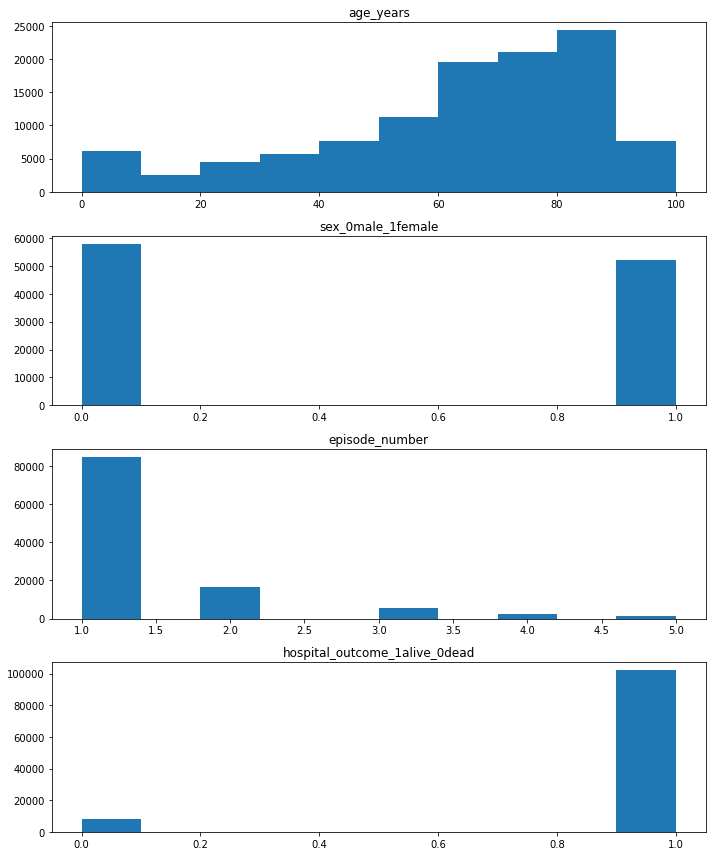

In [5]:
# TAREA 5
# ----- Aquí debe empezar tu código. Extensión aproximada: entre una y 12 líneas de código
# en función de los elementos que definas de cada gráfico.
[a, b] = [4, 1]
fig, axs = plt.subplots(a, b, figsize=(10, 12))
for i in range(a):
  for j in range(b):
    axs[i+j].hist(data_train[data_train.columns[i+j]])
    axs[i+j].set_title(str(data_train.columns[i+j]))
plt.tight_layout()
# ----- Aquí debe terminar tu código

# Reflexionemos sobre los datos
**TAREA 6**
A la luz de las gráficas que acabas de obtener, responde a las siguientes preguntas:
- ¿Qué conclusiones extraerías del histograma de la varable 'edad del paciente'? ¿Qué rango de edades son los más susceptibles de desarrollar un episodio de sepsis? ¿Por qué dirías que es así?
- ¿Existe algún desbalance en la variable 'género'? ¿Lo esperarías? ¿Por qué?
- ¿Qué ley parece seguir el número de infecciones cuando crece el número de episodios sufridos? ¿Por qué crees que es así?
- Como ya sabes por actividades anteriores, la última variable es la variable objetivo, la que determina si un paciente sobrevive o no sobrevive. Observando la distribución de valores de esa variable, ¿qué aspecto te resulta más significativo resaltar? ¿es la distribución de datos simétrica para esa variable? ¿qué quiere decir eso? ¿cómo crees que puede influir eso para la resolución de un problema de clasificación en el que la IA aprende de estos datos? ¿puede aprender a distinguir las dos clases con la misma precisión? ¿por qué? ¿qué se te ocurre que podría hacerse para solucionar este problema?

# Nuestro primer modelo de clasificación mediante IA

Una vez hemos entendido el problema que se nos presenta y hemos analizado la naturaleza y características esenciales de los datos suministrados, procedemos a la construcción del árbol de decisión que utilizaremos para distinguir las dos clases que tenemos definidas ('Sobrevive' y 'No sobrevive'). Para ello vamos a hacer uso de funciones del paquete scikit-learn.

No es necesario que sepas reproducir todo el código que hace falta, pues queremos centrarnos específicamente en las funciones que permiten crear el árbol de decisión, entrenarlo y emplearlo para hacer predicciones. Así que en la celda siguiente se presenta un conjunto de instrucciones necesarias para poder luego emplear las funciones del paquete scikit-learn. El código está explicado línea a línea. Léelo y pregunta al profesor/a si hay cualquier cosa que no entiendas.

In [6]:
feat_index = [0, 1, 2]                                    # define los índices que ubican los campos del
                                                          # dataframe que van a extraerse como características
                                                          # o variables predictoras. En nuestro caso, los
                                                          # tres primeros.

features = [data_train.columns[i] for i in feat_index]    # crea una lista con los nombres de las variables
                                                          # predictoras, usando una comprensión de listas

target = data_train.columns[3]                            # guarda en una variable el nombre de la variable
                                                          # objetivo

X_train = np.array(data_train[features])                  # guarda en la variable X todos los valores de las
Y_train = np.array(data_train[target])                    # variables predictoras y en la variable Y todos 
                                                          # los valores de la variable objetivo en sendos
                                                          # vectores (arrays) que es el formato de variable
                                                          # que necesitan luego las funciones que vamos a
                                                          # emplear.

Ahora ya estamos preparados para construir nuestro primer árbol de decisión. Para ello, consulta la página de la función [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y sigue los siguientes pasos:
- primero aplica la función  `DecisionTreeClassifier()`sin especificar el valor de ninguno de sus inputs (tomará todos los valores por defecto) para construir tu primer modelo, que puedes llamar `modelo_1`.
- segundo, entrena el modelo que has construido aplicando el método `fit()` al modelo que acabas de generar (a `modelo_1`) y pasándole los valores de las variables predictoras (`X_train`) y objetivo (`Y`) que has generado antes.
- tercero, dibuja el árbol resultante, utilizando la función `plot_tree()`. Para ello utiliza la sintaxis que se sugiere en [el ejemplo de la documentación de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

In [ ]:
# TAREA 7
# ----- Aquí debe empezar tu código. Extensión aproximada: 3 líneas de código
modelo_1 = tree.DecisionTreeClassifier()
modelo_1 = modelo_1.fit(X_train, Y_train)
tree.plot_tree(modelo_1)
# ----- Aquí debe terminar tu código


**TAREA 8**. Análisis del árbol de decisión.

Responde a las siguientes preguntas:
- ¿Te parece un árbol de decisión sencillo?
- ¿Podrías estimar cuál es la profundidad del árbol? (entendida como el número de ramificaciones que hay entre el primer nodo y el último).

***
Ahora vamos a examinar las características del modelo generado, utilizando tres métodos que, aplicado a nuestro modelo, nos ofrecerán información valiosa.
- el método [`get_depth()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_depth) te ofrece la profundidad del árbol generado por tu modelo.
- el método [`get_n_leaves()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_n_leaves) te ofrece el número de hojas del árbol generado por tu modelo. Esta, junto con el valor anterior, te ayudan a cuantificar la complejidad del modelo.

In [8]:
# TAREA 9
# Aquí vamos a estudiar algunas propiedades del modelo generado.
print(modelo_1.get_depth())             # Aplica el método get_depth() al modelo generado.
print(modelo_1.get_n_leaves())          # Aplica el método get_leaves() al modelo generado.

20
683


##Evaluando el modelo

Ahora queremos saber cómo de bien funciona nuestro modelo de predicción de clases. Para ello, primero importaremos otro conjunto de datos que no haya sido utilizado para el entrenamiento del modelo y que sirva para hacer predicciones y evaluar si nuestro modelo acierta o no cuando predice las distintas clases ('Sobrevive' y 'No sobrevive'). Para ello deberás importar un archivo csv cuyo nombre es `s41598-020-73558-3_sepsis_survival_study_cohort.csv`. Recuerda que para ello deberás emplear la función del paquete `pandas`, `read_csv()`. Puedes llamar a ese conjunto de datos `data_test`, para diferenciarlo del dataset empleado para el entrenamiento, `data_train`.

In [9]:
# TAREA 10
# ----- Aquí debe empezar tu código. Extensión aproximada: 3 líneas de código
data_test = pd.read_csv('s41598-020-73558-3_sepsis_survival_study_cohort.csv')
# ----- Aquí debe terminar tu código

De manera similar a como hicimos con los datos de entrenamiento, conviene hacer una breve exploración de los datos de test, para detectar posibles errores en los datos, desequilibrios de clase o cualquier otra información que puede ser relevante. Así que procede de manera similar a antes y haz un `info()` y un `describe()` a `data_test` (puedes utilizar la función [`print()`](https://cs.stanford.edu/people/nick/py/python-print.html) para que te muestre el resultado de cada función). Después, dibuja histogramas para cada uno de los campos presentes en `data_test` utilizando la función de `matplotlib.pyplot` llamada `hist()`, como has hecho con anterioridad.

In [10]:
# TAREA 11
# ----- Aquí debe empezar tu código. Extensión aproximada: entre 3 y 7 líneas de código
print(data_test.info())                                      # Aplica el método info() a data_test
print(data_test.describe())                                  # Aplica el método describe() a data_test
[data_test[data_test.columns[0]].unique(),                   # Aplica el método unique() a cada columna de data_test
data_test[data_test.columns[1]].unique(),
data_test[data_test.columns[2]].unique(),
data_test[data_test.columns[3]].unique()]
# ----- Aquí debe terminar tu código

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB
None
          age_years  sex_0male_1female  episode_number  \
count  19051.000000       19051.000000    19051.000000   
mean      72.503228           0.448585        1.396252   
std       18.614470           0.497363        0.783749   
min        0.000000           0.000000        1.000000   
25%       65.000000           0.000000        1.000000   
50%       77.000000           0.000000        1.000000   
75%       85.000000           1.000000        2.000000   
max      100.000000           1.000

[array([  7,  17,  70,  76,   8,  41,  60,  89,  81,  55,  66,  63,  33,
         73,  48,  11,  85,  44,  45,  79,  71,  50,  46,  78,  87,  83,
         59,  13,  90,  64,   6,  68,  72,  53,  82,  75,  67,  88,  91,
         74,  49,  18,  32,  65,  54,  56,   5,  61,  69,  62,  86,   9,
         52,  40,  19,  57,  39,  80,  96,  27,  58,  37,  77,  42,  51,
          3,  22,  35,  36,  47,  23,  28,  84,  25,  94,  21,  29,  12,
         24,  16,  92,  30,  38,  93,  43,  26,  15,  95,  10,  31, 100,
         34,  97,  98,  20,   2,   1,   4,  99,   0,  14]),
 array([1, 0]),
 array([1, 2, 3, 4, 5]),
 array([1, 0])]

Para mostrar los histogramas de cada una de las columnas de `data_test` puedes emplear primero la función [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) para generar una nueva figura, luego aplicar la función `plt.hist()` a la columna de `data_test` que quieras representar y luego poner un título a la gráfica con la función [`plt.title()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html). Cuando hayas hecho esto para cada columna, no olvides escribir la función [`plt.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) en la última línea, sin pasarle parámetros, para que se muestren todas las figuras.

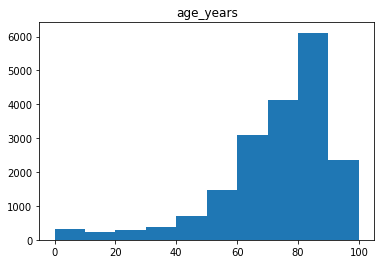

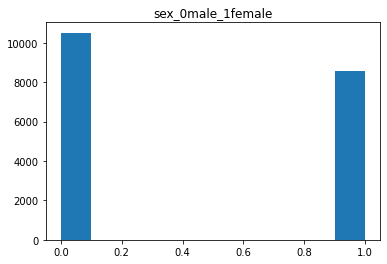

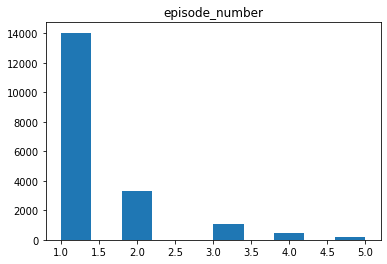

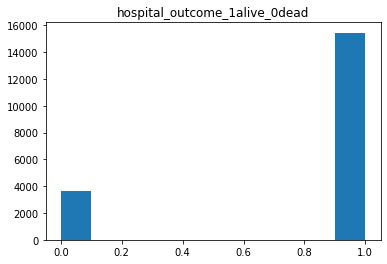

In [11]:
# TAREA 12
# ----- Aquí debe empezar tu código. Extensión aproximada: 1 y 3 líneas de código por figura, 4 figuras
plot1 = plt.figure(1)                         # Genera la figura con plt.figure()
plt.hist(data_test[data_test.columns[0]])     # Utiliza plt.hist() a cada columna de data_test
plt.title(str(data_test.columns[0]))          # Ponle título a la figura con plt.title()

plot2 = plt.figure(2)
plt.hist(data_test[data_test.columns[1]])    
plt.title(str(data_test.columns[1]))

plot3 = plt.figure(3)
plt.hist(data_test[data_test.columns[2]])    
plt.title(str(data_test.columns[2]))

plot4 = plt.figure(4)
plt.hist(data_test[data_test.columns[3]])    
plt.title(str(data_test.columns[3]))

plt.show()                                    # Utiliza plt.show()
# ----- Aquí debe terminar tu código

Ahora construimos las variables a emplear para la validación del modelo.

In [12]:
X_test = np.array(data_test[features])                              # guarda en la variable X todos los valores de las
Y_test = np.array(data_test[target]) 

Para evaluar cómo de bien clasifica el modelo tenemos varias opciones:
- la más sencilla es emplear el método [`score()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.get_n_leaves) aplicado a tu modelo. Requiere que le pases como parámetros datos de test sobre los que el modelo no ha sido entrenado, para valorar cuánto acierta en sus predicciones.
- la versión *'manual'* consiste en pedirle al modelo que genere la predicción y luego intentar hacer un gráfico que nos permita comparar visualmente la predicción de clase de la variable objetivo que sus valores reales.
En la celda que tienes a continuación deberás seguir ambos caminos.

0.8108760694976641


(array([ 3606.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

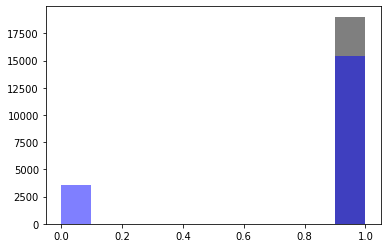

In [13]:
# TAREA 13
# ----- Aquí debe empezar tu código.

# PRIMERA OPCIÓN: empleo del método score() a tu modelo (1 línea de código). Recuerda que debes
# pasarle como inputs el valor de las variables predictoras en la zona de test, X_test, y el valor
# de la variable a predecir Y_test

print(modelo_1.score(X_test, Y_test))

# SEGUNDA OPCIÓN: empleo del método predict() al modelo generado, pasándole el valor de las 
# variables predictoras, X_test (1 línea de código). Luego grafica dos histograma juntos
# (basta con que utilices dos veces seguidas la función plt.hist()) que representen,
# por un lado, la predicción del modelo y, por otro, los valores reales de la variables objetivo
# que tenemos almacenada en Y_test. Para poder comparar visulamente las gráficas
# utiliza el parámetro alpha = 0.5, como input a la función plt.hist() para añadir
# transparencia a la gráfica y el parámetro color = 'k', como otro input a plt.hist() para cambiar
# el color de cada gráfica, 'k' quiere decir negro, 'r' rojo, 'g' verde, etc.

predicción = modelo_1.predict(X_test)
plt.hist(predicción, alpha = 0.5, color = 'k')
plt.hist(Y_test, alpha = 0.5, color = 'b')
# ----- Aquí debe terminar tu código

**TAREA 14**
- ¿Qué resultado arroja el método `score()`? Ese valor es un porcentaje, en tanto por uno, de los valores cuya predicción es correcta. ¿Te parece un buen resultado? ¿Por qué?
- A la vista de los histogramas que has dibujado, ¿dirías que el clasificador es bueno? ¿donde se está equivocando más, al intentar predecir si sobrevive o al intentar predecir que no sobrevive? ¿Por qué crees que puede estar comportándose así? ¿Podemos utilizarlo en la vida real? ¿Cuáles serían las consecuencias?

# Revisando el modelo
Vamos a afinar un poquito más el modelo generado, buscando que haga mejores predicciones. Para ello vamos a balancear las clases en los datos de entrenamiento, esto es, poner el mismo número de elementos clasificados como 'Sí sobrevive' como que 'No sobrevive' en los datos de entrenamiento de nuestro nuevo modelo. Así no estará sesgado por haber aprendido a reconocer *demasiado* una de las clases por encima de la otra.

In [15]:
# Aquí vamos a construir un dataset totalmente balanceado para mejorar los resultados de los clasificadores.
# Básicamente tomamos los N primeros positivos y los N primeros negativos y luegos los reordenamos para que
# aparezcan mezclados en las matrices de valores.

data_surv = data_train[data_train.hospital_outcome_1alive_0dead == 1]             # Separamos la clase Sí sobrevie de data_train
data_not_surv = data_train[data_train.hospital_outcome_1alive_0dead == 0]         # Separamos la clase Sí sobrevie de data_train
data_balanced = pd.concat([data_not_surv, data_surv.iloc[:len(data_not_surv)]])   # Unimos la clase 'No sobrevive', que es
                                                                                  # minoritaria, con el mismo número de elementos de la clase 'Sí sobrevive'
data_balanced_shuffled=data_balanced.sample(frac=1)                               # Aleatorizamos el orden de los elementos
data_train_2 = data_balanced_shuffled                                             # Guardamos el nuevo corpus de entrenamiento en la variable data_train_2

X_train_2 = np.array(data_train_2[features])      # Aquí generamos los valores que utilizaremos
Y_train_2 = np.array(data_train_2[target])        # para entrenar nuestro segundo modelo

In [ ]:
# Ahora debes reproducir las tareas 7 y 13, pero esta vez empleando el nuevo modelo que vas a generar.

# TAREA 15 (reproducción de la tarea 7 para el nuevo modelo) 3 líneas de código


modelo_2 = tree.DecisionTreeClassifier()        # Generar el modelo usando la función DecisionTreeClassifier()
modelo_2 = modelo_2.fit(X_train_2, Y_train_2)   # Entrenar el modelo usando el método fit() sobre el modelo
                                                # pasándole como parámetros los nuevos valores X_train_2 e Y_train_2
tree.plot_tree(modelo_2)                        # Graficar el árbol obtenido usando la función plot_tree()



In [17]:
# TAREA 16 (reproducción de la tarea 13 para el nuevo modelo)

print(modelo_2.score(X_test, Y_test))       # Calcula la precisión del numevo modelo utilizando el método
                                            # score() aplicado al nuevo modelo, pasándole como parámetros
                                            # las variables X_test, Y_test (1 línea)
predicción_2 = modelo_2.predict(X_test)             # Calcula la predicción del nuevo modelo para las variables X_test (1 línea)
plt.hist(predicción_2, alpha = 0.5, color = 'k')    # Dibuja el histograma de la predicción calculada (1 línea)
plt.hist(Y_test, alpha = 0.5, color = 'b')          # Sobre el anterior, dibuja el histograma de la variable objetivo (1 línea)

0.43472783580914387


**TAREA 17**
A la vista de los resultados anteriores, responde las siguientes cuestiones:
- El nuevo modelo, ¿mejora o empeora la precisión de sus predicciones?
- ¿Cuando se equivoca más? ¿Al intentar predecir que 'Sí sobrevive' o al intentar predecir que 'No sobrevive'?
- Si hubieras de elegir uno de los dos modelos que has calculado para ayudar al hospital de tu barrio, ¿cuál elegirías? ¿Por qué?